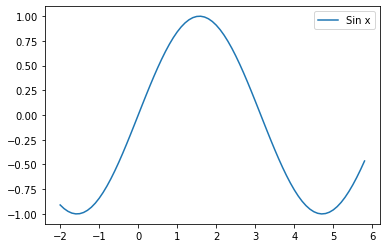

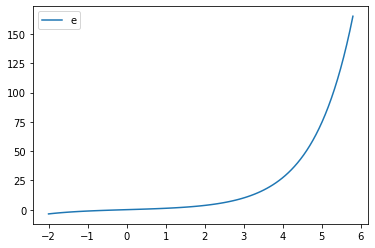

In [1]:
#TASK A
import numpy as np
import math as mt
import matplotlib.pyplot as plt

x1 = np.arange(-2,5.9,0.1)
y1 = np.sin(x1)

x2 = np.linspace(-2,5.8,100)
y2 = ((mt.e**(x2))-(mt.e**(-x2)))/2

plt.figure(1)
plt.plot(x1,y1, label = 'Sin x')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(x2,y2, label = 'e')
plt.legend()
plt.show()




-1.3499999999999994


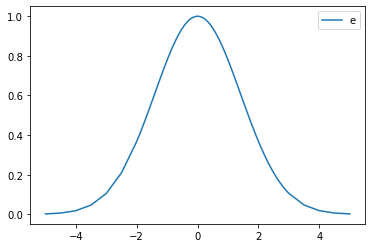

In [26]:
xi = np.arange(-5,-1.5,0.5)
xii = np.arange(-1.95,3,0.05)
xiii = np.arange(3,5.5,0.5)
x3 = np.array(list(xi)+list(xii)+list(xiii))

print(x3[19])
y3 = mt.e**(-(x3**2)/4)

plt.figure(3)
plt.plot(x3,y3, label = 'e')
plt.legend()
plt.show()

In [4]:
#Task B

H = np.zeros((30,20))

H[5,:]=np.array(list(range(50,70)))
#Row 6
H[:,7]=np.array(list(range(100,130)))
#Column 8

S = np.zeros((6,6))

for x in range(6):
    S[x,x] = 1
    S[x,5-x] = 1

In [5]:
#TASK C

import random

R = np.zeros((10,5))

for y in range(10):
    for x in range(5):
        R[y,x]=random.randint(1,100)

Rt = np.zeros((5,10))

for x in range(5):
    Rt[x]=R[:,x]


In [30]:
#TASK D

MatAfile = open("MatA.txt","r")
MatA = MatAfile.readlines()
MatAfile.close
MatBfile = open("MatB.txt","r")
MatB = MatBfile.readlines()
MatBfile.close
MatAlist = []
MatBlist = []
for i in range(len(MatA)):
    #rstrip removes the line break
    MatAlist.append(int(MatA[i].rstrip()))
    MatBlist.append(int(MatB[i].rstrip()))
    
templistA = []
templistB = []
rows = 0
MatA = []
MatB = []
for i in range(60*60):
    templistA.append(MatAlist[i])
    templistB.append(MatBlist[i])
    if (i+1)%60==0:
        #print("satisfied at i = ",i)
        MatA+=[templistA]
        MatB+=[templistB]
        templistA = []
        templistB = []
A = np.array(MatA)
B = np.array(MatB)

#print(A[10,34])

#print(A)
#print("")
#print(B)

C = A + B
print(C[10,34])
At = np.zeros((60,60))

for x in range(60):
    At[x]=A[:,x]

D = 0.5*(A+At)+0.5*(A-At)

78


In [32]:
#TASK E
def MatMat(A,B):
    if np.shape(A) != np.shape(B):
        return(0)
    P = np.zeros((60,60))
    for RowsA in range(60):
        for ColB in range(60):
            P[RowsA,ColB] = sum(A[RowsA]*B[:,ColB])
    return(P)
    
P = MatMat(A,B)
print(P[34,10])
#P2 = MatMat(B,A)
#print(P2)


155023.0


In [7]:
TA = np.array([[2,3],[4,1]])
TB = np.array([[1,2],[1,1]])

def MatMat(A,B):
    if np.shape(A) != np.shape(B):
        return(0)
    P = np.zeros((2,2))
    for RowsA in range(2):
        for ColB in range(2):
            P[RowsA,ColB] = sum(A[RowsA]*B[:,ColB])
    return(P)
    
P = MatMat(TA,TB)
print(P)
print(np.shape(TA))

[[5. 7.]
 [5. 9.]]
(2, 2)


In [40]:
TA = np.array([[3,1,3,1],[1,2,3,4],[1,5,1,2],[0,5,1,2]])
def Minor(A,i,j):
    M = np.delete(A,i,0)
    M = np.delete(M,j,1)
    return(M)

def Determinant(A,Det):
    calcdet = 0
    if np.shape(A) == (2,2):
        return(A[0,0]*A[1,1]-A[0,1]*A[1,0])
    else:
        for j in range(np.shape(A)[1]):
            M = Minor(A,0,j)
            sign = (-1)**(j%2)
            calcdet = Determinant(M,0) * A[0,j] * sign
            Det += calcdet            
    return(Det)

def Adjoint(A,Ad):
    #if np.shape(A) == (2,2):
        #Ad = np.copy(A)
        #Ad[0,0] = A[1,1]
        #Ad[0,1] = -A[0,1]
        #Ad[1,0] = -A[1,0]
        #Ad[1,1] = A[0,0]
        #return Ad
    if np.shape(A) == (2,2):
        return(A[0,0]*A[1,1]-A[0,1]*A[1,0])
    for i in range(np.shape(A)[1]):
        for j in range(np.shape(A)[1]):
            M = Minor(A,i,j)
            sign = (-1)**(j+i)
            calcdet = Determinant(M,0) * sign
            Ad[j,i] = calcdet
    return(Ad)

#print(Determinant(TA,0))
#print(np.linalg.det(TA))

#Y = np.array([[-3,2,-5,2],[-1,0,-2,2],[3,-4,1,3],[2,-1,1,0]])
#add if statement for when matrix is 2x2
#ba = np.zeros(np.shape(Y))
#print(Adjoint(Y,ba))

def Inverse(A):
    det = Determinant(A,0)
    ba = np.zeros(np.shape(A))
    if np.shape(A) == (2,2):
        ba[0,0] = A[1,1]
        ba[0,1] = -A[0,1]
        ba[1,0] = -A[1,0]
        ba[1,1] = A[0,0]
        Adj = ba
    else:
        Adj = Adjoint(A,ba)
    return(Adj/det)
IA = Inverse(TA)

def MatMat(A,B):
    if np.shape(A)[1] != np.shape(B)[0]:
        print("no")
        return(0)
    Pshape = (np.shape(A)[0],np.shape(B)[1])
    P = np.zeros(Pshape)
    
    for RowsA in range(np.shape(A)[0]):
        for ColB in range(np.shape(B)[1]):
            P[RowsA,ColB] = sum(A[RowsA]*B[:,ColB])
    return(P)


#P = MatMat(IA,TA)
#print(P)

#H = np.array([[2,1,3],[1,0,1],[1,2,1]])
#b = np.array([[0],[1],[2]])
H = [[8,-2,1,3],[1,-5,2,1],[-1,2,7,2],[2,-1,3,8]]
H = np.array(H)
b = np.array([[9],[-7],[-1],[5]])


IH = Inverse(H)

#print(type(np.shape(IH)[1]))
#print(type(np.shape(b)[0]))
soli = MatMat(IH,b)
print(soli)
#b = np.array()

def Cramer(H,b):
    detH = Determinant(H,0)
    Pshape = (np.shape(H)[0],np.shape(b)[1])
    P = np.zeros(Pshape)
    for column in range(np.shape(H)[1]):
        B = np.copy(H)
        B[:,column] = b[:,0]
        detB = Determinant(B,0)
        P[column] = detB/detH
    return(P)
solc = Cramer(H,b)
print(solc)




[[ 1.32323232]
 [ 1.56565657]
 [-0.60606061]
 [ 0.71717172]]
[[ 1.32323232]
 [ 1.56565657]
 [-0.60606061]
 [ 0.71717172]]


In [13]:
TA = np.array([[3,1,3,1],[1,2,3,4],[1,5,1,2],[0,5,1,2]])

print(TA[1])

[1 2 3 4]
